## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
## Reading the data and storing it in df

In [3]:
df=pd.read_csv("ab_data.csv")

In [4]:
##Checking the data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
##Checking the shape of the dataframe
df.shape

(294478, 5)

b. Use the cell below to find the number of rows in the dataset.

In [6]:
print(("Number of rows:{}". format (df.shape[0])))

Number of rows:294478


c. The number of unique users in the dataset.

In [7]:
print(("Number of unique users: {}".format(df['user_id'].nunique())))

Number of unique users: 290584


d. The proportion of users converted.

In [8]:
## Filtering the data for converted & storing it in con
con = df.query('converted == 1')

In [9]:
## Checking
con.head()

,user_id,timestamp,group,landing_page,converted
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1


In [10]:
a=con.shape[0]/df.shape[0]

In [11]:
print(("Proposition of users converted : {}".format(a)))

Proposition of users converted : 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [12]:
## filtering the dataframe for treatment group
treatment_oldpage = df.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page")')

In [13]:
treatment_oldpage.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [14]:
treatment_oldpage.shape

(3893, 5)

In [15]:
## The 3893 times new_page and treatment dont match

f. Do any of the rows have missing values?

In [16]:
 ## Checking null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [17]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [18]:
## There are no missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [19]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df2.shape

(290585, 5)

In [22]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [23]:
## There are no data points that will result in reducing the accuracy

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
c= df2['user_id'].nunique()

In [25]:
print(("Number of Unique User ID's in df2 :  {}". format(c)))

Number of Unique User ID's in df2 :  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [26]:
sum(df2['user_id'].duplicated())

1

In [27]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [28]:
## 773192 is the user_id that is repeated

c. What is the row information for the repeat **user_id**? 

In [29]:
## 2893 is the row number that has repeated user_id

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [30]:
## Dropping duplicated user_id's
df2=df2.drop_duplicates('user_id')

In [31]:
## Checking the shape of the dataframe after dropping the duplicate value
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [32]:
## Probability = number of items with 1/ total number of items
d = (df2 ['converted']==1).mean()

In [33]:
d

0.11959708724499628

In [34]:
print((" Probability of items being converted : {}" . format(d)))

 Probability of items being converted : 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [35]:
## Calculating the probability of the cotrol group and converted
control_conv_prob = (df2[df2['group'] == "control"]['converted'].mean())

In [36]:
control_conv_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [37]:
## Calculating the conditional probability of the cotrol group and converted
treat_conv_prob =  (df2[df2['group'] == "treatment"]['converted'].mean())

In [38]:
treat_conv_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [39]:
new_page= df2[df2['landing_page']=='new_page']

In [40]:
new_page.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [41]:
new_page_prob = new_page.shape[0]/df2.shape[0]

In [42]:
new_page_prob

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.



Ans e --> Considering the result from the analysis done in part a and part d my results are as follows:
1. As we cleaned the data (the treatment group --> new_page & the contol group --> old_page) this means the result will be accurate. We can see that 50% of users are recieveing new_page and the conversion rate is 11.8%
2. As the data is approximately 50-50 divided we can also say that control group users will see the old_page and their conversion rate is 12.03%
3. From this we can see that old_page is having better slightly new_page as the difference is small we cannot say that the new_page will not beneficial(practical significance)
3. This analysis gives us an idea but it is not suufficient to decide whether the new_page will be better than old_page 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The null and alternate hypothesis are given below

$H_{0}$ : $p_{new}$ - $p_{old}$ <= 0

$H_{1}$ : $p_{new}$ -  $p_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [43]:
p_new= df2['converted'].mean()

In [44]:
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [45]:
## Under null hypothesis we assume that new_page and old_page conversion rate is equal
p_old=df2['converted'].mean()

In [46]:
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [47]:
treatment_group = df2.query("group == 'treatment'")

In [48]:
n_new = treatment_group.shape[0]

In [49]:
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [50]:
old_group = df2.query("group == 'control'")

In [51]:
n_old = old_group.shape[0]

In [52]:
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [53]:
## for simulating two scenario's like coin flips we use np.binomial
new_page_converted = np.random.binomial(n_new,p_new)

In [54]:
new_page_converted

17447

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [55]:
old_page_converted = np.random.binomial(n_old,p_old)

In [56]:
old_page_converted

17420

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [57]:
diff_conv = (new_page_converted/n_new) - (old_page_converted/n_old)

In [58]:
diff_conv

0.0001561020697940646

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [59]:
new_page_converted_s= np.random.binomial(n_new,p_new,10000)/n_new
old_page_converted_s= np.random.binomial(n_old,p_old,10000)/n_old
p_diffs = new_page_converted_s - old_page_converted_s
    

In [60]:
p_diffs

array([-0.00078666,  0.00111304,  0.00086511, ..., -0.0003048 ,
        0.0004592 ,  0.00109226])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   10.,    90.,   416.,  1413.,  2667.,  2822.,  1769.,   674.,
          127.,    12.]),
 array([-0.00468244, -0.00377184, -0.00286125, -0.00195065, -0.00104006,
        -0.00012947,  0.00078113,  0.00169172,  0.00260232,  0.00351291,
         0.0044235 ]),
 <a list of 10 Patch objects>)

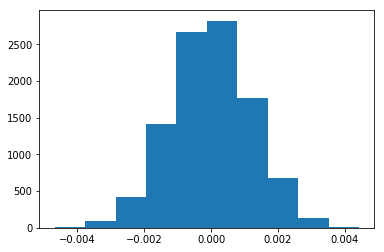

In [61]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [62]:
## Calculating the difference between actual means
actualdiff =  treat_conv_prob - control_conv_prob

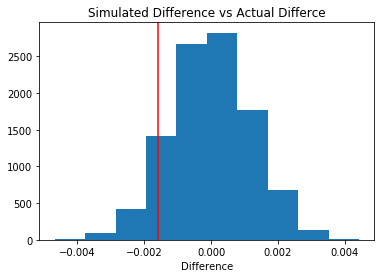

In [63]:
## The red line represents the details of the 
plt.hist(p_diffs)
plt.title("Simulated Difference vs Actual Differce")
plt.xlabel("Difference")
plt.axvline(x= actualdiff, color ='red')

In [64]:
prop_diff_more = (p_diffs > actualdiff).mean()

In [65]:
prop_diff_more

0.90620000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Since the p_val(ie prop_diff_more) is equal to 0.90 and the alpha value is 0.05 as we took 5% Type 1 error. This means the p-value is greater than 0.05, hence we fail to reject Null Hypothesis. This means that there is no statistical difference between the users getting converted using the new page and the old page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [66]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [67]:
import statsmodels.api as sm
## extracting users that got converted using the old_page and the new_page ie converted (number of success rate) 
convert_old = df2.query('landing_page == "old_page" and converted ==1').shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted ==1").shape[0]


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [68]:
convert_old

17489

In [69]:
convert_new

17264

In [70]:
## extraing the number of users recieving the odl page and the new page (number of observation)
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

In [71]:
n_new

145310

In [72]:
n_old

145274

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [73]:
stat,pval=sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative='smaller') 
## We are taking alternative as smaller because proption of old is smaller than propotion of new

In [74]:
print(stat)

1.31092419842


In [75]:
print(pval)

0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

As we use the built in function in the stats model we are getting the p-value is 0.905 and z-stat (zscore) to be 1.3109. If we compare the p-value in j it was 0.9035 and we were fail to reject null hypotheis as the p-value > apha value. Similar for the the rest of results by the above built in function the p-value > alpha (0.05) **hence we fail to reject Null Hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As we looked in the case of card fraud or no fraud we used logistic regresssion. I beleive in this case we need to use logistics regression as we have converted or no converted (categorical data)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [76]:
## Copying the data for the logistic regression 
df2_copy =df2.copy()

In [77]:
df2_copy.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [78]:
df2_copy[['converted','notconverted']]= pd.get_dummies(df2_copy['converted'])

In [79]:
df2_copy.drop('notconverted',axis=1,inplace=True)

In [80]:
df2_copy['ab_page']=pd.get_dummies(df2_copy['group'])['treatment']

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [81]:
## adding intercept column ==1 in the df2_copy dataframe
df2_copy['intercept'] =1

In [82]:
## Creating the logistc model for dependent variable converted on intercept and ab_page
logit_mod=sm.Logit(df2_copy['converted'],df2_copy[['intercept','ab_page']])

In [83]:
## fitting the model
fit1 =logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.112142
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
## Displaying the summary of above fitted model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Jun 2019   Pseudo R-squ.:               3.154e-06
Time:                        02:42:43   Log-Likelihood:                -32587.
converged:                       True   LL-Null:                       -32587.
                                        LLR p-value:                    0.6503
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9888      0.008    246.669      0.000       1.973       2.005
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

In [85]:
## For interprteting the data we exponentiate the the intercept
np.exp(-1.9888),np.exp(-0.0150)

(0.13685955841614492, 0.98511193960306265)

In [86]:
## Taking the reciprocal of the coefficients
1/np.exp(-1.9888),1/np.exp(-0.0150)

(7.3067603868728614, 1.0151130646157189)

(When we take the reciprocal this means 1 unit decreas holding other everything constant) as the coefficients had negative value we took the reciprocal

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

1. When we build null and alternate hypothesis for regression models we want check if the dependent variabe is dependent on the explanatory variable ie.. how close the regression model will predict the values of y vaiable to its actual y variable. It means the alternate hypothesis is there is difference when the user falls into either a treatment group or control group and gets converted making it a two tailed test
2. In part 2 and part 1 we were creating alternate hypothesis saying that proposition of converting using new_page is more than converting using old_page ie... it makes the test one-tailed
3. The p-value observed in part 3 is 0.190 and the p-value observed in part2 and part 1 was 0.95, 0.93 respectively
4. The difference in the p-value is due to the direction in test
5. But since the p-value is greated than 0.05 we **fail to reject null hypothesis here**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The regression model above was based upon if a person falls in the traeatment group or control group and gets converted. It means the prediction will be dependent upon which group the person is assigned. This makes the model not accurate and we see that from the p-value of ab_page making it not statistical significant. We could have added a duration column helping us to know how much time a users spends on the page before taking the decicsions. This will help us in making better decicion or deciding a better model. But adding more variables could increase the complexity like the duration can be related to group because if the page has some changes that reduces time then users with new group (treatment group) will be related. For eg: If you fall under treatment you will get converted. Yeah so for the correct model we need to see whats the accuracy,precicion of the model

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
## Reading the country data set
df3=pd.read_csv("countries.csv")

In [88]:
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [89]:
## Merging the two dataframes and storing the merged dataframe in df4 (using inner join)
df4=pd.merge(df2_copy,df3,how='inner',on='user_id')

In [90]:
df4.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,0,1,US


In [91]:
## Checking the Unique Countries
df4.groupby('country').nunique()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
country,,,,,,,,
CA,14499,14499,2,2,2,2,1,1
UK,72466,72466,2,2,2,2,1,1
US,203619,203619,2,2,2,2,1,1


In [92]:
## Creating dummy variables for country country
df4[['CA','UK','US']] = pd.get_dummies(df4['country'])

In [93]:
df4.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,0,1,US,0,0,1


In [94]:
## Building the logistic model on the 'UK','US','intecept'.'ab_page'
logit_mod1=sm.Logit(df4['converted'],df4[['intercept','UK','US','ab_page']])

In [95]:
results = logit_mod1.fit()

Optimization terminated successfully.
         Current function value: 0.112141
         Iterations 6


In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 Jun 2019   Pseudo R-squ.:               8.958e-06
Time:                        02:42:45   Log-Likelihood:                -32586.
converged:                       True   LL-Null:                       -32587.
                                        LLR p-value:                    0.9001
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0300      0.027     76.249      0.000       1.978       2.082
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
==============================================================================
"""

In [97]:
np.exp(results.params)

intercept    7.614303
UK           0.950621
US           0.960062
ab_page      1.015056
dtype: float64

We can see that p-value of the intecept(CA) and UK  is statistically significant
1. From this we can infer that convertion of the user is 1.0519 times when the user falls in UK region, holding everything constant
2. We can also say that the conversiont rate of CA is less than UK and US by 0.131 times

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [98]:
## Working with higher order to make the model better
df4['UK-ab_page']=df4['UK']*df4['ab_page']


In [99]:
df4['US-ab_page']=df4['US']*df4['ab_page']

In [100]:
df4.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,UK-ab_page,US-ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,1,0,1,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,1,0,1,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,1,US,0,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,1,US,0,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,0,0,1,US,0,0,1,0,0


In [101]:
## When we are building a regression model using the higher order terms we need to use the lower order terms
logit_mod2=sm.Logit(df4['converted'],df4[['intercept','ab_page','UK','UK-ab_page','US-ab_page','US']])

In [102]:
##Fitting the model
results2=logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.112140
         Iterations 6


In [103]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Jun 2019   Pseudo R-squ.:               1.343e-05
Time:                        02:42:46   Log-Likelihood:                -32586.
converged:                       True   LL-Null:                       -32587.
                                        LLR p-value:                    0.9720
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0040      0.036     55.008      0.000       1.933       2.075
ab_page        0.0674      0.052      1.297      0.195      -0.034       0.169
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
UK-ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
US-ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
==============================================================================
"""

From the above summary table we can see that the p-value is still higher than the aplha value 0.05; hence we fail to reject null hypothesis

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [106]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0